# introduction and line

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import datetime as dt

C:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


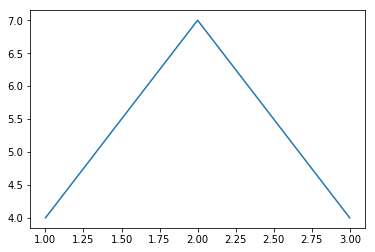

In [4]:
plt.plot([1,2,3],[4,7,4])
plt.show()

# legends titles and labels

In [7]:
x = [1,2,3]
y = [5,7,4]

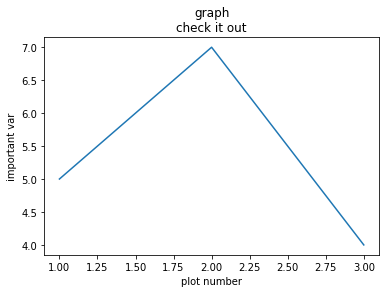

In [9]:
plt.plot(x,y)
plt.xlabel('plot number')
plt.ylabel('important var')
plt.title('graph\ncheck it out')
plt.show()

In [10]:
x2 = [1,2,3]
y2 = [10,14,12]

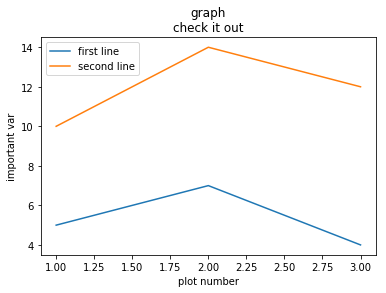

In [11]:
plt.plot(x,y, label ='first line') 
plt.plot(x2,y2, label = 'second line')
plt.xlabel('plot number')
plt.ylabel('important var')
plt.title('graph\ncheck it out')
plt.legend()
plt.show()

# bar chart and histogram

In [17]:
x = [2,4,6,8,10]
y = [6,7,8,2,4]

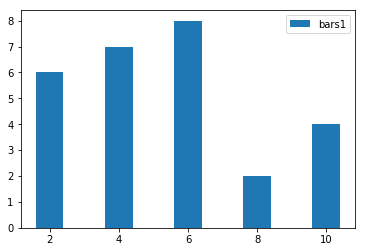

In [26]:
plt.bar(x,y,label = 'bars1')
plt.legend()
plt.show()

In [20]:
x2 = [1,3,5,7,9]
y2 = [7,8,2,4,2]

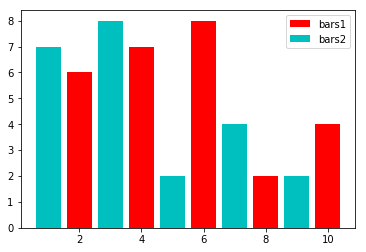

In [25]:
plt.bar(x,y,label = 'bars1', color = 'r')
plt.bar(x2,y2,label = 'bars2', color = 'c')
plt.legend()
plt.show()

In [27]:
population_ages = [22,55,62,45,21,68,74,95,100,18,130,120,95,34,42,43,45,28,26]
ids = [x for x in range(len(population_ages))]

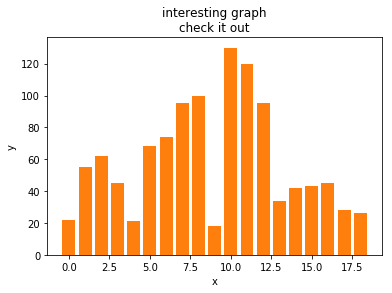

In [37]:
plt.bar(ids, population_ages)

plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()

In [41]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

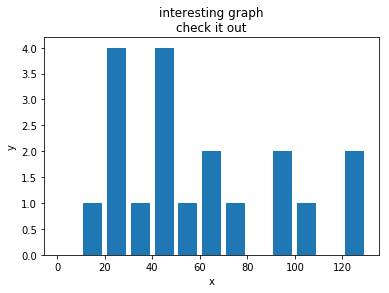

In [42]:
plt.hist(population_ages, bins, histtype = 'bar', rwidth = 0.8)
# bins : y값을 범위로 나눠서 비교가능
plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()

# scatter plot

In [46]:
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,6,7,3,9,1]

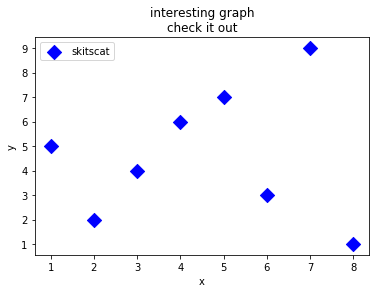

In [52]:
plt.scatter(x, y, label = 'skitscat', color = 'b', 
            marker = 'D',s = 100)
# marker : 마커 지정 / s : 마커 사이즈 지정
plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()

# stack plots

In [54]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7] 
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

In [57]:
plt.plot([],[],color = 'm', label = 'sleeping')
plt.plot([],[],color = 'c', label = 'eating')
plt.plot([],[],color = 'r', label = 'working')
plt.plot([],[],color = 'k', label = 'playing')

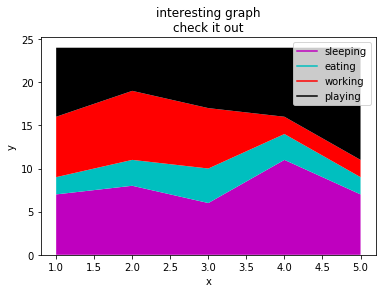

In [58]:
plt.stackplot(days, sleeping, eating, working, playing,
             colors = ['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()
# stackplot은 legend label 바로 못 붙임 그래서 위처럼 해야됨

# pie chart

In [69]:
slices = [7,2,2,13]
activities = ['sleeping', 'eating','working','playing']
cols = ['c','m','r','b']

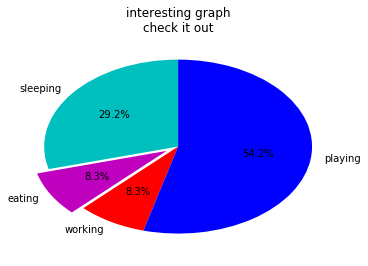

In [70]:
plt.pie(slices, labels = activities, colors = cols,
       startangle = 90, 
       explode = (0,0.1,0,0),
       autopct = '%1.1f%%') 
#startangle : 시작점 조정 
#explode : 그림처럼 나오게 할 수 있음
#autopct  : 그래프 상 표시 방법 조절
plt.title('interesting graph\ncheck it out')
plt.show()

# loading data from file

In [1]:
import csv

part1

In [2]:
x = []
y = []

In [3]:
with open('example.txt','r') as csvfile : 
    plots = csv.reader(csvfile, delimiter=',') #csv는 콤마로 구분되니까
    for row in plots : 
        x.append(int(row[0]))
        y.append(int(row[1]))

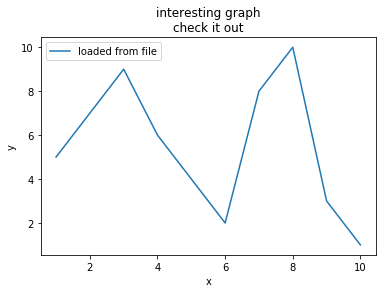

In [81]:
plt.plot(x,y, label = 'loaded from file')

plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()

part2

In [7]:
import numpy as np

In [86]:
x, y = np.loadtxt('example.txt', delimiter = ',', unpack = True)
#load~ : 데이터가 있는 형태(txt, csv 등등)

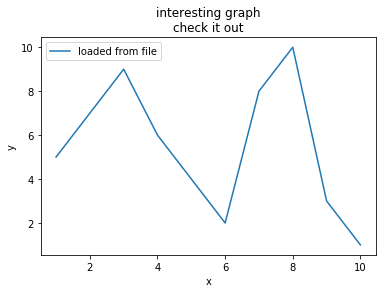

In [87]:
plt.plot(x,y, label = 'loaded from file')

plt.xlabel('x')
plt.ylabel('y')
plt.title('interesting graph\ncheck it out')
plt.legend()
plt.show()

# getting data from the internet

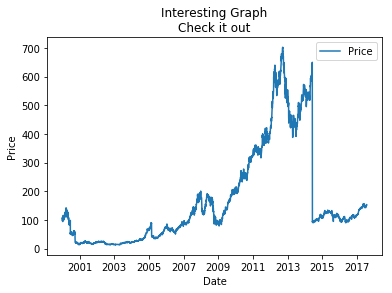

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()


graph_data('TSLA')

# more customization of colors and fills, rotating labels

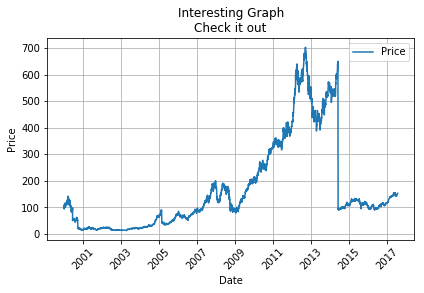

In [54]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))# one of two major ways to get subplots
#(1,1) says this is a 1 x 1 grid.(0,0) is us saying the "starting point" for this sub plot will be 0,0.
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
        # label 기울기
        
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    #grid 조정

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('TSLA')

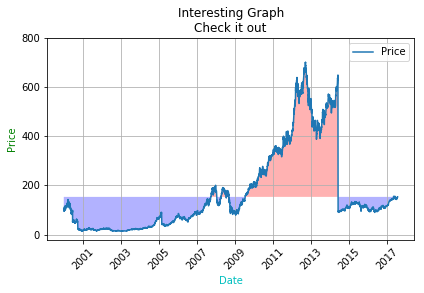

In [72]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))# one of two major ways to get subplots
#(1,1) says this is a 1 x 1 grid.(0,0) is us saying the "starting point" for this sub plot will be 0,0.
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    
    ax1.fill_between(date, closep, closep[0], where =(closep > closep[0]), facecolor = 'r',alpha = 0.3) 
    ax1.fill_between(date, closep, closep[0], where =(closep < closep[0]), facecolor = 'b',alpha = 0.3)
    # 중간에 있는 par들로 기준나눌 수 있음, alpha : 진함정도, facecolor : 색
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    #x축 label기울기
    
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    
    ax1.xaxis.label.set_color('c') # 각 축의 label 색
    ax1.yaxis.label.set_color('g')
    
    ax1.set_yticks([0,200,400,600,800]) # y축 tick 조정

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

graph_data('TSLA')

# spine and horizontal line

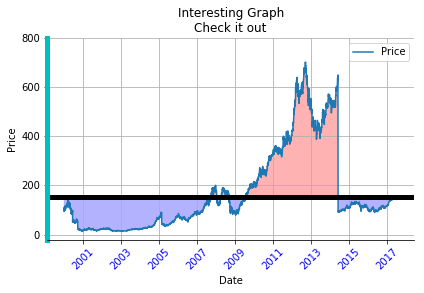

In [76]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    
    ax1.axhline(closep[0], color = 'k', linewidth = 5)
    #axhline 으로 원하는 곳에 수평선 그리기 가능
    
    ax1.fill_between(date, closep, closep[0], where =(closep > closep[0]), facecolor = 'r',alpha = 0.3) 
    ax1.fill_between(date, closep, closep[0], where =(closep < closep[0]), facecolor = 'b',alpha = 0.3)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    #ax1.xaxis.label.set_color('c')
    #ax1.yaxis.label.set_color('g')
    ax1.set_yticks([0,200,400,600,800])
    
    ax1.spines['left'].set_color('c')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_linewidth(5)
    #spine 조정
    
    ax1.tick_params(axis = 'x', colors = 'b')
    # x축 tick 조정

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

graph_data('TSLA')

# candlestick OHLC graphs

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt

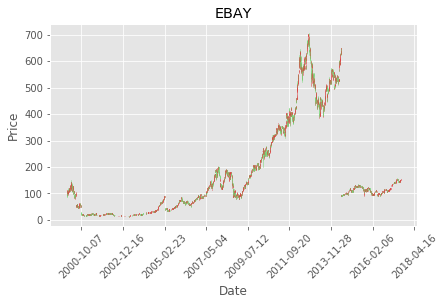

In [27]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

# style

In [21]:
from matplotlib import style

In [22]:
style.use('ggplot') #원하는 style 사용

In [25]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


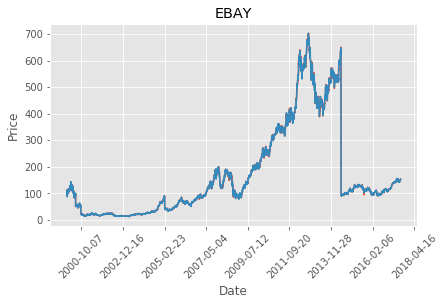

In [24]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    #candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    ax1.plot(date, closep)
    ax1.plot(date, openp)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

# live graphs

In [11]:
import matplotlib.animation as animation
from matplotlib import style

In [12]:
style.use('fivethirtyeight')

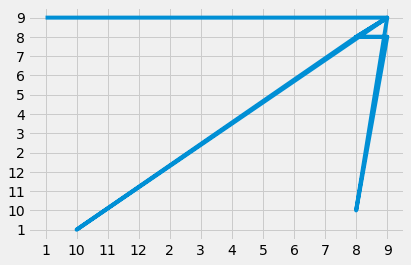

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) #나중에 애기함

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear() # 혹시 이전게 있으면 이전것을 지우는 것
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval = 1000)
#interval = 1000 : 여기서 1000은 1초로 1초마다 업데이트
plt.show() # 근데 잘 안됨

# annotation and placing text 
# annotation last price to edge of matplot graph ex

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

C:\anaconda\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


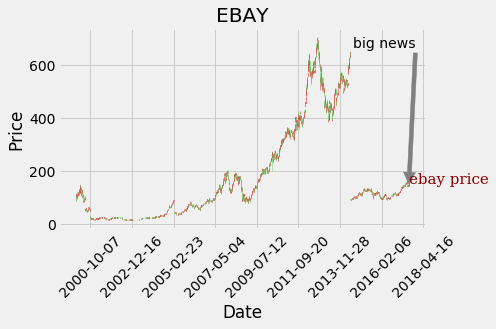

In [40]:
style.use('fivethirtyeight')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    # annotation ex with arrow
    ax1.annotate('big news', (date[9], highp[9]),
                xytext=(0.8, 0.9), textcoords = 'axes fraction',
                arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    font_dict = {'family' : 'serif',
                 'color' : 'darkred',
                 'size' : 15}
    # hard coded ex
    ax1.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    # 그래프에 글씨 쓰는 것

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')


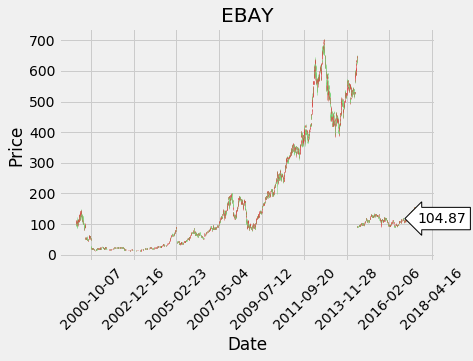

In [49]:
style.use('fivethirtyeight')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    bbox_props = dict(boxstyle = 'larrow', fc='w', ec='k',lw=1)
    
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[8], closep[-1]), bbox = bbox_props)
    
    # annotation ex with arrow
    #ax1.annotate('big news', (date[9], highp[9]),
                #xytext=(0.8, 0.9), textcoords = 'axes fraction',
                #arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    #font_dict = {'family' : 'serif',
                 #'color' : 'darkred',
                 #'size' : 15}
    # hard coded text
    #ax1.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    # 그래프에 글씨 쓰는 것

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    #plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')


In [ ]:
# 위치가 잘 안됨 원래 date[-1]인데 ㅠㅠ

# subplot

In [50]:
import random

In [ ]:
#add subplot syntax

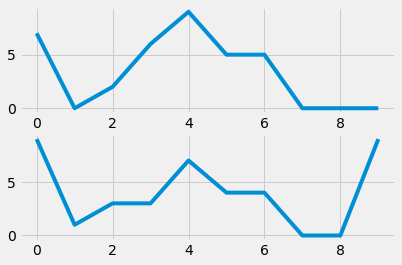

In [55]:
fig = plt.figure()

def creat_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x, y =creat_plots()
ax1.plot(x, y)

x, y =creat_plots()
ax2.plot(x, y)

plt.show()

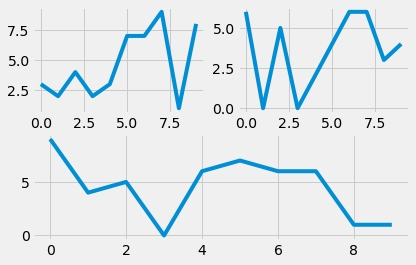

In [60]:
fig = plt.figure()

def creat_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(221) #2*2 모양에서 1번
ax2 = fig.add_subplot(222) #2*2 모양에서 2번
ax3 = fig.add_subplot(212) #2*1 모양에서 1번

x, y =creat_plots()
ax1.plot(x, y)

x, y =creat_plots()
ax2.plot(x, y)

x, y =creat_plots()
ax3.plot(x, y)

plt.show()

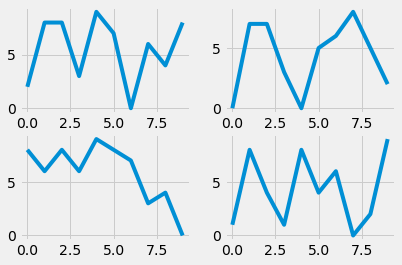

In [59]:
fig = plt.figure()

def creat_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(221) #2*2 모양에서 1번
ax2 = fig.add_subplot(222) #2*2 모양에서 2번
ax3 = fig.add_subplot(223) #2*2 모양에서 3번
ax4 = fig.add_subplot(224) #2*2 모양에서 4번

x, y =creat_plots()
ax1.plot(x, y)

x, y =creat_plots()
ax2.plot(x, y)

x, y =creat_plots()
ax3.plot(x, y)

x, y =creat_plots()
ax4.plot(x, y)

plt.show()

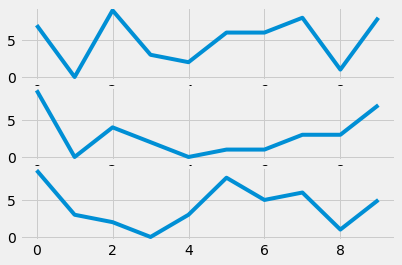

In [62]:
fig = plt.figure()

def creat_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=2, colspan=1)
ax2 = plt.subplot2grid((6,1),(2,0),rowspan=2, colspan=1)
ax3 = plt.subplot2grid((6,1),(4,0),rowspan=2, colspan=1)
#(6,1) : 6*1 grid 만듬 , (0,0) : 시작하는 부분

x, y =creat_plots()
ax1.plot(x, y)

x, y =creat_plots()
ax2.plot(x, y)

x, y =creat_plots()
ax3.plot(x, y)

plt.show()

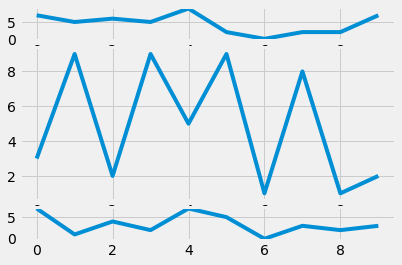

In [63]:
fig = plt.figure()

def creat_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=1, colspan=1)
ax2 = plt.subplot2grid((6,1),(1,0),rowspan=4, colspan=1)
ax3 = plt.subplot2grid((6,1),(5,0),rowspan=1, colspan=1)
#(6,1) : 6*1 grid 만듬 , (0,0) : 시작하는 부분
#span : 아마 차지하는 부분 표현인듯

x, y =creat_plots()
ax1.plot(x, y)

x, y =creat_plots()
ax2.plot(x, y)

x, y =creat_plots()
ax3.plot(x, y)

plt.show()

# implementing subplots to our stock charts

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

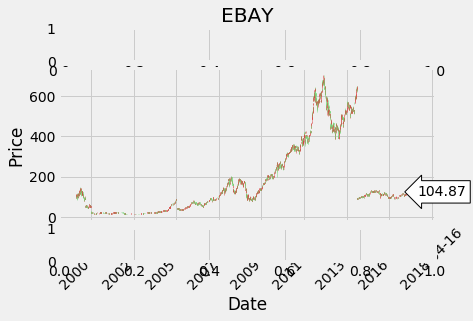

In [65]:
style.use('fivethirtyeight')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)
    #title 이랑 label 예쁘게 붙이려면 위처럼 ax1이랑 2밑에 넣어야겠지
    
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle = 'larrow', fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[8], closep[-1]), bbox = bbox_props)
    
    # annotation ex with arrow
    #ax1.annotate('big news', (date[9], highp[9]),
                #xytext=(0.8, 0.9), textcoords = 'axes fraction',
                #arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    #font_dict = {'family' : 'serif',
                 #'color' : 'darkred',
                 #'size' : 15}
    # hard coded text
    #ax1.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    # 그래프에 글씨 쓰는 것

   
    #plt.legend()
    #plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

In [ ]:
# 강사가 걍 다음에 하자고 하고 넘어감

# adding more indicator data to our charts

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

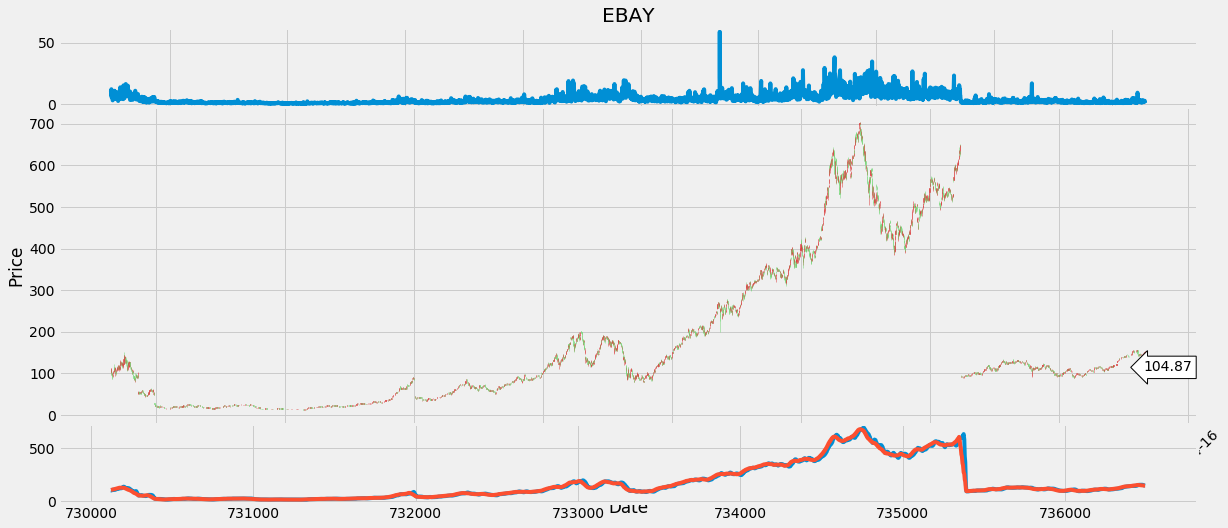

In [70]:
style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

def moving_average(values, window) :
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows
    

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)
    #title 이랑 label 예쁘게 붙이려면 위처럼 ax1이랑 2밑에 넣어야겠지
    
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
        
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    
    h_1 = list(map(high_minus_low, highp, lowp))
    
    ax1.plot_date(date,h_1,'-')

    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle = 'larrow', fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[8], closep[-1]), bbox = bbox_props)
    
    # annotation ex with arrow
    #ax2.annotate('big news', (date[9], highp[9]),
                #xytext=(0.8, 0.9), textcoords = 'axes fraction',
                #arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    #font_dict = {'family' : 'serif',
                 #'color' : 'darkred',
                 #'size' : 15}
    # hard coded text
    #ax2.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    # 그래프에 글씨 쓰는 것
    
    ax3.plot(date[-start:], ma1[-start:])
    ax3.plot(date[-start:], ma2[-start:])

   
    #plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

# cleaning , sharex

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

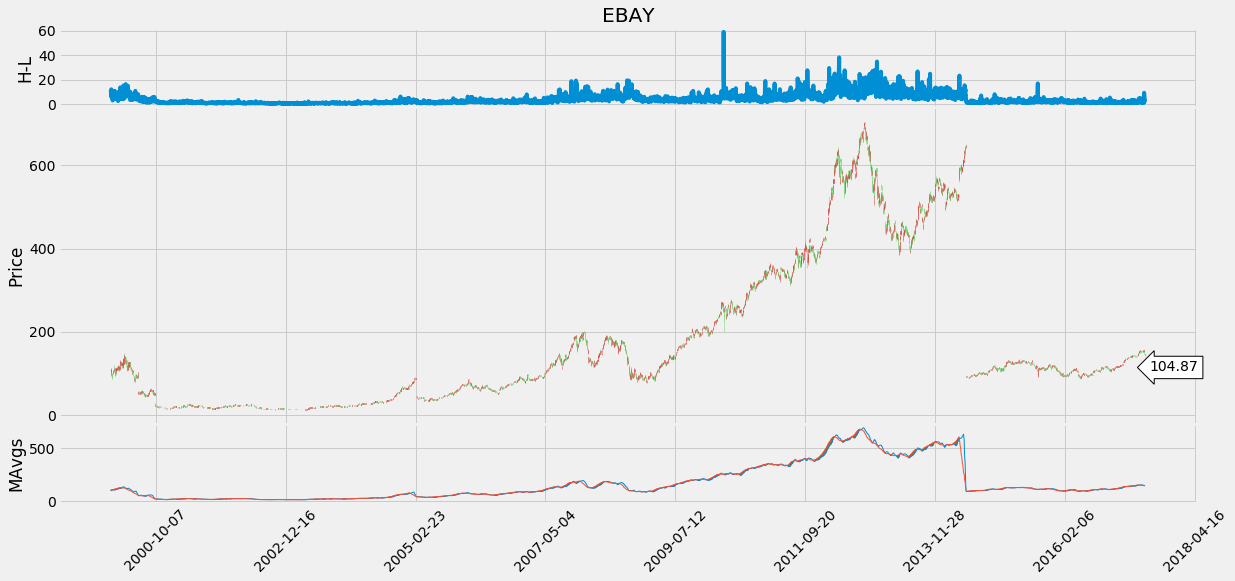

In [14]:
style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

def moving_average(values, window) :
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows
    

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1, sharex = ax1)
    #plt.xlabel('Date') 필요없음    ##sharex : x축을 동일한 기준으로! 말그대로 share
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
    plt.ylabel('MAvgs')
    #title 이랑 label 예쁘게 붙이려면 위처럼 각 ax 밑에 넣어야겠지
    
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
        
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    
    h_1 = list(map(high_minus_low, highp, lowp))
    
    ax1.plot_date(date[-start:],h_1[-start:],'-')
    ##
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))
    #prune으로 지우고 싶은 축에서 해당 놈(locator라고 하는 듯)

    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper')) 
    ax2.grid(True)
    
    bbox_props = dict(boxstyle = 'larrow', fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[8], closep[-1]), bbox = bbox_props)
    
    # annotation ex with arrow
    #ax2.annotate('big news', (date[9], highp[9]),
                #xytext=(0.8, 0.9), textcoords = 'axes fraction',
                #arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    #font_dict = {'family' : 'serif',
                 #'color' : 'darkred',
                 #'size' : 15}
    # hard coded text
    #ax2.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    # 그래프에 글씨 쓰는 것
    
    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
    
    ###
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                    where = ( ma1[-start:] < ma2[-start:]), facecolor='r',
                    edgecolor='r', alpha=0.5)
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                    where = ( ma1[-start:] < ma2[-start:]), facecolor='g',
                    edgecolor='r', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
    
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)

    
    ##
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

# multi y axis plotting volume on stock chart + customizing legend

In [ ]:
#subplot 에서 다른 데이터를 쓰고 싶을 때/ scale이 다른 등드의 문제 발생

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

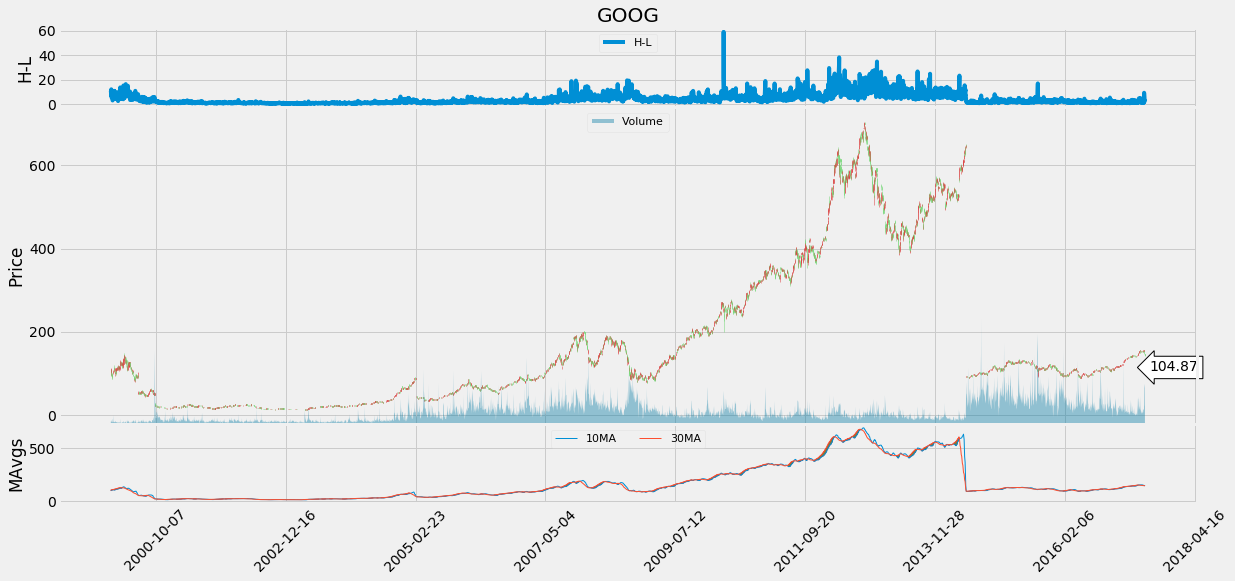

In [22]:
style.use('fivethirtyeight')

MA1 = 10
MA2 = 30

def moving_average(values, window) :
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows
    

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure(figsize=(20,10), facecolor = '#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1, sharex = ax1)
    #plt.xlabel('Date') 필요없음    ##sharex : x축을 동일한 기준으로! 말그대로 share
    plt.ylabel('Price')
    
    ## twinx : 실제로 share 하는거지 ax2에 다른 그래프 추가
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
    plt.ylabel('MAvgs')
    #title 이랑 label 예쁘게 붙이려면 위처럼 각 ax 밑에 넣어야겠지
    
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
        
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2-1:])
    
    h_1 = list(map(high_minus_low, highp, lowp))
    
    ax1.plot_date(date[-start:],h_1[-start:],'-', label = 'H-L')
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))
    #prune으로 지우고 싶은 축에서 해당 놈(locator라고 하는 듯)

    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
        
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper')) 
    ax2.grid(True)
    
    bbox_props = dict(boxstyle = 'larrow', fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[8], closep[-1]), bbox = bbox_props)
    
    # annotation ex with arrow
    #ax2.annotate('big news', (date[9], highp[9]),
                #xytext=(0.8, 0.9), textcoords = 'axes fraction',
                #arrowprops = dict(facecolor = 'gray', color = 'grey'))
    #화살표로 표시
    #(date[9], highp[9]) :  가르키는 위치 지정
    #xytext = (0.8, 0.9) : text가 화면에 x축의 80%, y축의 90%에 위치
    
    # font dict ex
    #font_dict = {'family' : 'serif',
                 #'color' : 'darkred',
                 #'size' : 15}
    # hard coded text # 그래프에 글씨 쓰는 것
    #ax2.text(date[7], closep[1],'ebay price', fontdict = font_dict)
    
    
    ##fill일때 label 이 안되니까 가짜로 만듬
    ax2v.plot([],[],color='#0079a3', alpha = 0.4, label = 'Volume')
    ##ax2v 조정
    ax2v.fill_between(date[-start:],0, volume[-start:],facecolor='#0079a3', alpha=0.4 )
    ax2v.axes.yaxis.set_ticklabels([]) #여기서는 없애버렸음 필요하면 쓰고 아니면 없앰
    ax2v.grid(False) #grid더러워 보여서 없앰
    ax2v.set_ylim(0, 3*volume.max()) #volume의 ylim을 조정 위로 너무 뻗어가서
    
    
    ax3.plot(date[-start:], ma1[-start:], linewidth = 1, label=(str(MA1)+'MA'))
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1, label=(str(MA2)+'MA'))

    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                    where = ( ma1[-start:] < ma2[-start:]), facecolor='r',
                    edgecolor='r', alpha=0.5)
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                    where = ( ma1[-start:] < ma2[-start:]), facecolor='g',
                    edgecolor='r', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
    
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    ##
    ax1.legend()
    leg = ax1.legend(loc=9, ncol=2, prop={'size':11}) #loc:위치, ncol:??
    leg.get_frame().set_alpha(0.4)         
    ax2v.legend()
    leg = ax2v.legend(loc=9, ncol=2, prop={'size':11}) 
    leg.get_frame().set_alpha(0.4)
    ax3.legend()
    leg = ax3.legend(loc=9, ncol=2, prop={'size':11}) 
    leg.get_frame().set_alpha(0.4)
    
    plt.show()
    fig.savefig('google.png', facecolor = fig.get_facecolor())


graph_data('GOOG')